# 0. Import libraries & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data.data_loader import DataLoader
from utils.preprocessing import TimeSeriesPreprocessor
from models.lstm_model import LSTMModelWrapper  # Import the LSTM model
from models.xgboost_model import XGBoostModel
from models.catboost_model import CatBoostModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

/Users/hamzagorgulu/Desktop/Self Improvement/Career/Job Applications/KoçDigital/Case/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initialize components
data_loader = DataLoader('../data/multistep_regression.csv')
df = data_loader.load_data()
df

,Year,Month,Value
date,,,
1999-01-01,1999,1,40.575599
1999-02-01,1999,2,65.182165
1999-03-01,1999,3,63.089448
1999-04-01,1999,4,81.853452
1999-05-01,1999,5,48.081737
...,...,...,...
2022-01-01,2022,1,38.527122
2022-02-01,2022,2,55.861375
2022-03-01,2022,3,80.490987


# 1.Exploratory Data Analysis

In [3]:
df.describe()

,Year,Month,Value
count,281.000000,281.000000,281.000000
mean,2010.213523,6.437722,33.195956
std,6.774740,3.463669,25.893953
min,1999.000000,1.000000,3.474676
25%,2004.000000,3.000000,15.062259
50%,2010.000000,6.000000,23.753365
75%,2016.000000,9.000000,41.247543
max,2022.000000,12.000000,139.154873


<Axes: xlabel='Year'>

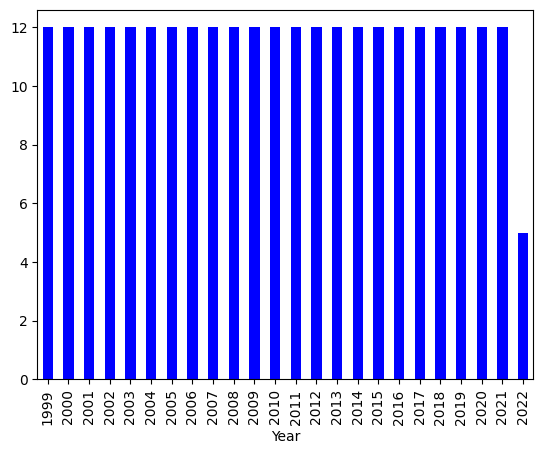

In [4]:
df["Year"].value_counts().sort_index().plot(kind='bar', color='blue')

- There seems to be no missing data.
- The data frequency is monthly.

# 2. Use of Traditional Methods (Xgboost, Catboost)

## 2.1 Feature Engineering & Preprocessing

In [5]:
preprocessor = TimeSeriesPreprocessor()

df = preprocessor.create_features(df)
train, test = data_loader.split_data(df)

In [6]:
train

,Year,Month,Value,Prev_Year_Mean,Lag1_Inflow_6,Lag1_Inflow_12,Short_vs_Long_Term,Month_Sin,Month_Cos,Year_Sin,Year_Cos
date,,,,,,,,,,,
2000-05-01,2000,5,71.659560,33.390943,14.388636,48.081737,-18.012054,5.000000e-01,-8.660254e-01,-0.866025,-5.000000e-01
2000-06-01,2000,6,26.482899,33.390943,16.142621,24.487741,-12.134585,1.224647e-16,-1.000000e+00,-0.866025,-5.000000e-01
2000-07-01,2000,7,11.270656,33.390943,30.791891,12.416174,-3.275926,-5.000000e-01,-8.660254e-01,-0.866025,-5.000000e-01
2000-08-01,2000,8,14.326710,33.390943,32.892093,7.119303,11.703734,-8.660254e-01,-5.000000e-01,-0.866025,-5.000000e-01
2000-09-01,2000,9,10.812216,33.390943,60.412320,11.749033,43.049610,-1.000000e+00,-1.836970e-16,-0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,2019,8,21.042764,27.515803,58.039700,31.452783,29.139225,-8.660254e-01,-5.000000e-01,1.000000,4.653844e-14
2019-09-01,2019,9,20.663660,27.515803,60.509732,18.546146,32.462404,-1.000000e+00,-1.836970e-16,1.000000,4.653844e-14
2019-10-01,2019,10,24.216716,27.515803,106.099785,22.367401,32.990396,-8.660254e-01,5.000000e-01,1.000000,4.653844e-14


In [7]:
test

,Year,Month,Value,Prev_Year_Mean,Lag1_Inflow_6,Lag1_Inflow_12,Short_vs_Long_Term,Month_Sin,Month_Cos,Year_Sin,Year_Cos
date,,,,,,,,,,,
2020-01-01,2020,1,40.818475,45.909451,19.474606,77.886218,-20.543508,0.500000,8.660254e-01,8.660254e-01,-0.500000
2020-02-01,2020,2,51.462599,45.909451,21.042764,58.039700,-26.162098,0.866025,5.000000e-01,8.660254e-01,-0.500000
2020-03-01,2020,3,81.438948,45.909451,20.663660,60.509732,-24.735505,1.000000,6.123234e-17,8.660254e-01,-0.500000
2020-04-01,2020,4,86.329096,45.909451,24.216716,106.099785,-26.202104,0.866025,-5.000000e-01,8.660254e-01,-0.500000
2020-05-01,2020,5,51.819910,45.909451,18.317547,71.782898,-19.768118,0.500000,-8.660254e-01,8.660254e-01,-0.500000
2021-01-01,2021,1,33.547298,37.980623,16.739063,40.818475,-18.944794,0.500000,8.660254e-01,5.000000e-01,-0.866025
2021-02-01,2021,2,50.566502,37.980623,20.845344,51.462599,-18.954236,0.866025,5.000000e-01,5.000000e-01,-0.866025
2021-03-01,2021,3,57.122634,37.980623,24.570318,81.438948,-17.620925,1.000000,6.123234e-17,5.000000e-01,-0.866025
2021-04-01,2021,4,55.491812,37.980623,19.579757,86.329096,-16.822087,0.866025,-5.000000e-01,5.000000e-01,-0.866025


In [8]:
# Prepare features
X_train, X_test, y_train, y_test = preprocessor.prepare_data(train, test)

/Users/hamzagorgulu/Desktop/Self Improvement/Career/Job Applications/KoçDigital/Case/regression/src/utils/preprocessing.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Year', 'Month'], axis=1, inplace=True)
/Users/hamzagorgulu/Desktop/Self Improvement/Career/Job Applications/KoçDigital/Case/regression/src/utils/preprocessing.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Year', 'Month'], axis=1, inplace=True)


# 3. Training & Results

In [9]:
# Initialize and train models
models = {
    'XGBoost': XGBoostModel(n_trials=50),
    'CatBoost': CatBoostModel(n_trials=50)
}

In [10]:
predictions = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.train(X_train, y_train, X_test, y_test)
    predictions[name] = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions[name])
    rmse = np.sqrt(mean_squared_error(y_test, predictions[name]))
    mape = mean_absolute_percentage_error(y_test, predictions[name])
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAPE(%): {mape*100:.2f}%")  # Convert to percentage
    
    # Print feature importance
    print(f"\n{name} Feature Importance:")
    importance = model.get_feature_importance()
    for feature, imp in sorted(importance.items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {imp:.4f}")

: 

: 

# 3. Use of Deep Learning Method (LSTM)

## 2.1 Preprocessing

In [ ]:
data = data_loader.load_data()
data = preprocessor.create_features(data)
train, test = data_loader.split_data(data)

In [ ]:
# Prepare features for LSTM
target_column = 'Value' 
seq_length = 12  # Sequence length for LSTM

## 2.2 Training

In [ ]:
# Initialize and train models
models = {
    'LSTM': LSTMModelWrapper(input_size=1, hidden_size=100, num_layers=2, output_size=1, dropout=0.2)
}

In [ ]:
predictions = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    # Train the model with Optuna hyperparameter optimization
    model.train(
        data, 
        target_column=target_column, 
        seq_length=seq_length, 
        num_epochs=150, 
        batch_size=8, 
        learning_rate=0.001, 
        use_optuna=True  # Enable Optuna for hyperparameter optimization
    )
    
    # Make predictions
    predictions[name] = model.predict(test, target_column=target_column, num_predictions=len(test))
    
    # Calculate metrics
    y_test = test[target_column].values[-len(predictions[name]):]  # Align test data with predictions
    mae = mean_absolute_error(y_test, predictions[name])
    rmse = np.sqrt(mean_squared_error(y_test, predictions[name]))
    mape = mean_absolute_percentage_error(y_test, predictions[name])
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAPE(%): {mape*100:.2f}%")  # Convert to percentage
